<a href="https://colab.research.google.com/github/utkuyucel/Data-Analysis/blob/main/Tips_Dataset_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.width", 500)

In [25]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
def check_df(dataframe, head = 5):
    print("###################### Shape ######################")
    print(dataframe.shape)
    print("###################### Types ######################")
    print(dataframe.dtypes)
    print("###################### Head ######################")
    print(dataframe.head(head))
    print("###################### Tail ######################")
    print(dataframe.tail(head))
    print("###################### NA ######################")
    print(dataframe.isnull().sum())
    print("###################### Quantiles ######################")
    print(dataframe.describe().T)

  

check_df(df)

###################### Shape ######################
(244, 7)
###################### Types ######################
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object
###################### Head ######################
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
###################### Tail ######################
     total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
2

In [27]:
df.sort_values(by = ["total_bill"], inplace = True, ascending = False)
df.head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [28]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [29]:
# Get categorical ones - Layer 1
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
print(cat_cols)

['sex', 'smoker', 'day', 'time']


In [30]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in [int, float] ]
print(num_but_cat)

['size']


In [31]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and df[col].dtypes in ["category", "object"]]
print(cat_but_car)

[]


In [32]:
cat_cols = cat_cols + num_but_cat
print(cat_cols)

['sex', 'smoker', 'day', 'time', 'size']


In [33]:
cat_vals_df = df[cat_cols]
cat_vals_df.head()

,sex,smoker,day,time,size
170,Male,Yes,Sat,Dinner,3
212,Male,No,Sat,Dinner,4
59,Male,No,Sat,Dinner,4
156,Male,No,Sun,Dinner,6
182,Male,Yes,Sun,Dinner,3


In [36]:
cat_vals_df.dtypes

sex       category
smoker    category
day       category
time      category
size         int64
dtype: object

In [39]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({
        col_name : dataframe[col_name].value_counts(),
        "Ratio" : 100 * dataframe[col_name].value_counts() / len(dataframe)
    }))
    print("##################################################")
    

In [41]:
for col in cat_vals_df:
  cat_summary(df, col)

        sex      Ratio
Male    157  64.344262
Female   87  35.655738
##################################################
     smoker      Ratio
No      151  61.885246
Yes      93  38.114754
##################################################
      day      Ratio
Sat    87  35.655738
Sun    76  31.147541
Thur   62  25.409836
Fri    19   7.786885
##################################################
        time      Ratio
Dinner   176  72.131148
Lunch     68  27.868852
##################################################
   size      Ratio
2   156  63.934426
3    38  15.573770
4    37  15.163934
5     5   2.049180
6     4   1.639344
1     4   1.639344
##################################################


In [42]:
# Hangi cinsiyet ortalama ne kadar bahşiş veriyor?
# Mean tip amount and count by gender
df.groupby(["sex"]).agg({
    "tip": ["mean"],
    "sex": ["count"]
})

,tip,sex
,mean,count
sex,,
Male,3.089618,157
Female,2.833448,87


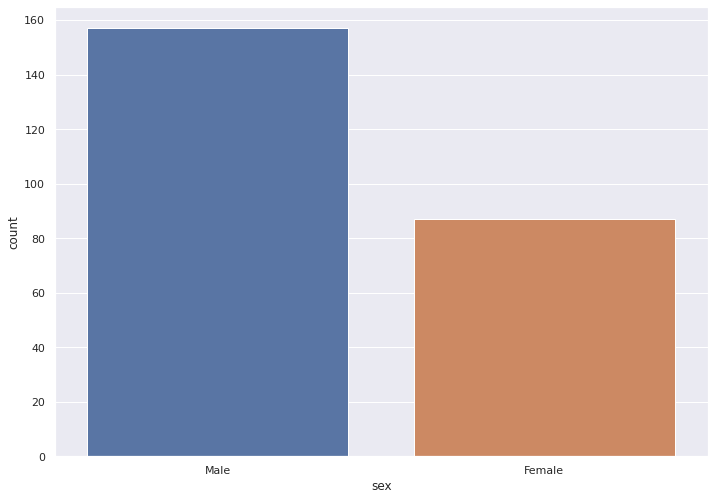

In [43]:
# Hesabı kim ödüyor? 
# Who pays the check most?
df["sex"].value_counts()

sns.countplot(x = df["sex"], data = df)

In [44]:
# Hangi cinsiyet en çok hangi öğünde hesap ödüyor?
# count of checks by meal times and gender
df.groupby(["sex", "time"]).agg({
    "time": ["count"]
})

time
              count
sex    time        
Male   Lunch     33
       Dinner   124
Female Lunch     35
       Dinner    52

In [45]:
# Hangi cinsiyet, masada kaç kişi varken hesabı ödüyor
# Which gender pays for the check based on how many people are at the table
df.groupby(["sex", "size"]).agg({
    "sex":["count"]
})

sex
            count
sex    size      
Male   1        1
       2       98
       3       24
       4       28
       5        4
       6        2
Female 1        3
       2       58
       3       14
       4        9
       5        1
       6        2

In [46]:
# Günlere göre ortalama alınan bahşiş miktarı
# Mean tip amount by days.
df.groupby(["day"]).agg({
    "tip" : ["mean", "max","count"]
})

tip             
          mean    max count
day                        
Thur  2.771452   6.70    62
Fri   2.734737   4.73    19
Sat   2.993103  10.00    87
Sun   3.255132   6.50    76

In [53]:
# Sigara içenlerin ve içmeyenlerin verdikleri ortalama bahşiş
# Mean tip amount of smokers and non-smokers
df.groupby(["smoker"]).agg({
    "tip": ["count"]
})

,tip
,count
smoker,
Yes,93
No,151


In [47]:
corr = df.corr()

In [48]:
 corr.unstack().sort_values(ascending = False)

total_bill  total_bill    1.000000
tip         tip           1.000000
size        size          1.000000
total_bill  tip           0.675734
tip         total_bill    0.675734
total_bill  size          0.598315
size        total_bill    0.598315
tip         size          0.489299
size        tip           0.489299
dtype: float64

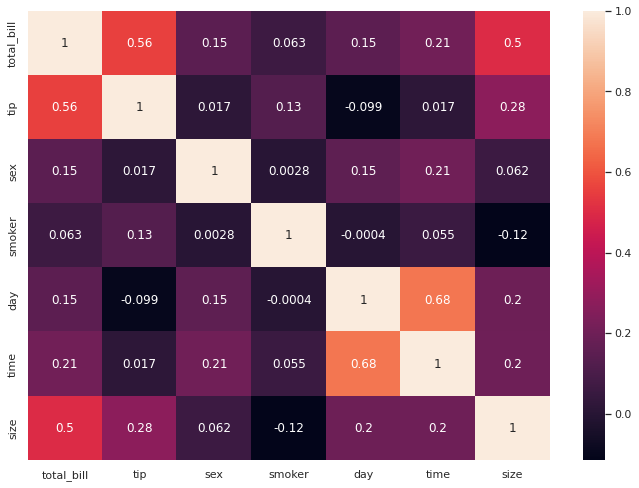

In [49]:
#Turning integer columns into categorical for defining correlation between variables
sns.set(rc={'figure.figsize':(11.7,8.27)})

df_corr = df.apply(lambda x: x.factorize()[0]).corr(method='pearson') 

correlation_matrix = df_corr

sns.heatmap(correlation_matrix, annot = True)
plt.show()
